# Task 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X = (X-np.mean(X,axis=0))/np.std(X,axis=0)
cov = np.cov(X.T)
eig_val, eig_vec = np.linalg.eig(cov)
print("Wartości własne: \n", eig_val)
print("Wektor wartości własnych: \n", eig_vec)

Wartości własne: 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Wektor wartości własnych: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


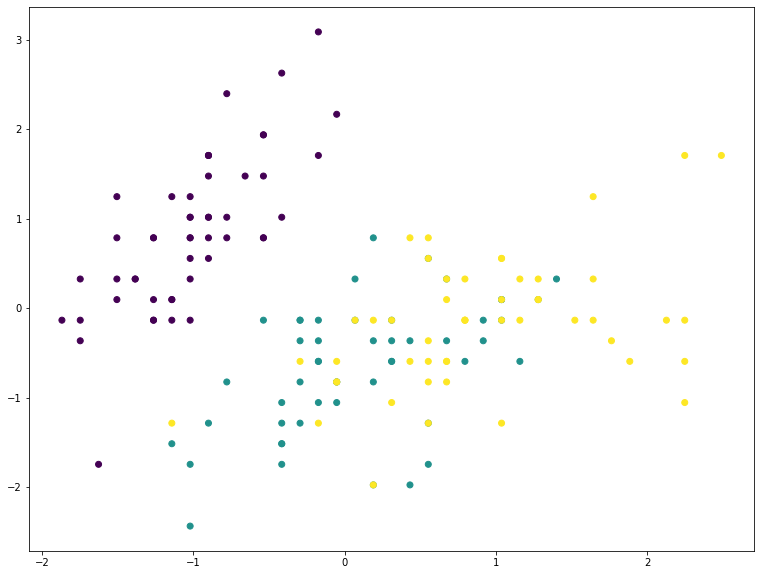

In [2]:
plt.figure(figsize=(13,10))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

I wymiar


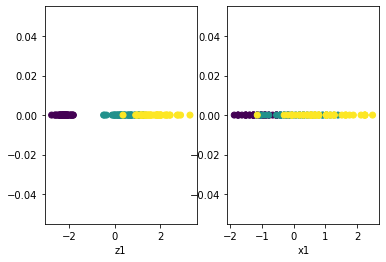

In [3]:
dim1 = np.dot(X, eig_vec[:,0])

print("I wymiar")
plt.subplot(1, 2, 1)
plt.scatter(dim1, np.zeros(dim1.shape), c=y)
plt.xlabel('z1')
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], np.zeros(dim1.shape), c=y)
plt.xlabel('x1')
plt.show()

II wymiar


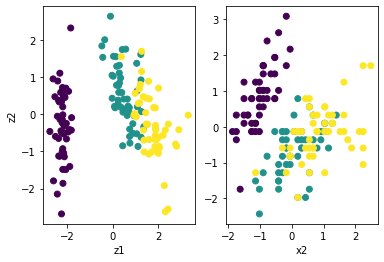

In [4]:
dim2 = np.dot(X, eig_vec[:,0:2])

print("II wymiar")
plt.subplot(1, 2, 1)
plt.scatter(dim2[:,0], dim2[:,1],c=y)
plt.xlabel('z1')
plt.ylabel('z2')
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

III wymiar


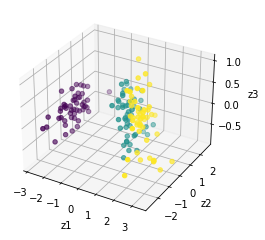

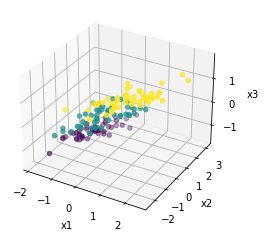

In [5]:
dim3 = np.dot(X, eig_vec[:,0:3])

print("III wymiar")
ax = plt.axes(projection='3d')
ax.scatter3D(dim3[:,0], dim3[:,1], dim3[:,2],c=y)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('z3')
plt.show()

ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2],c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

# Task 2

USA Arrests

In [6]:
data = pd.read_csv('USArrests.csv', index_col=0)
data.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [8]:
data.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [9]:
data.std()

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [10]:
data.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

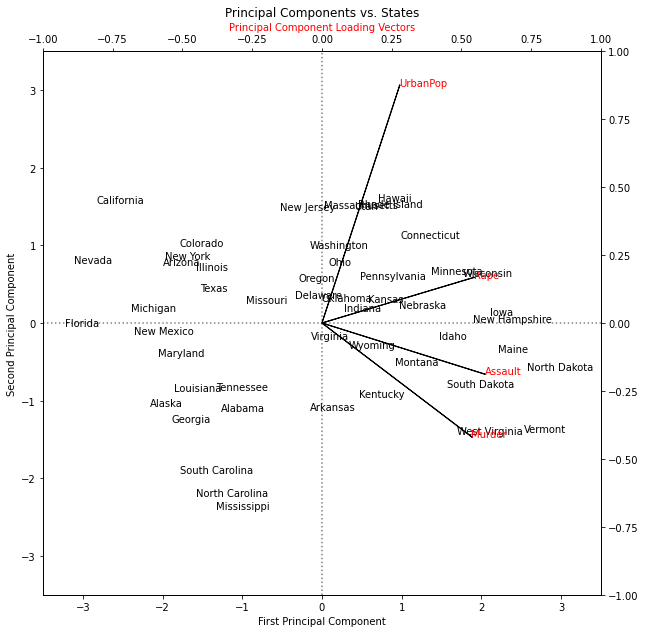

In [11]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
X = pd.DataFrame(scale(data), index=data.index, columns=data.columns)
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=data.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()
fig,ax1 = plt.subplots(figsize=(10,10))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
for i in df_plot.index:
    ax1.annotate(i,(-df_plot.PC1.loc[i],-df_plot.PC2.loc[i]),ha='center')
ax1.hlines(0,-3.5,3.5,linestyles='dotted',colors='grey')
ax1.vlines(0,-3.5,3.5,linestyles='dotted',colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Principal Components vs. States')
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component Loading Vectors',color='red')
for i in pca_loadings[['V1','V2']].index:
    ax2.annotate(i,(pca_loadings.V1.loc[i],-pca_loadings.V2.loc[i]),color='red')
ax2.arrow(0,0,pca_loadings.V1[0],-pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1],-pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2],-pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3],-pca_loadings.V2[3])

In [12]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [13]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

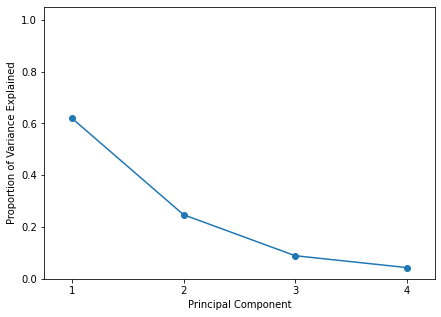

In [14]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

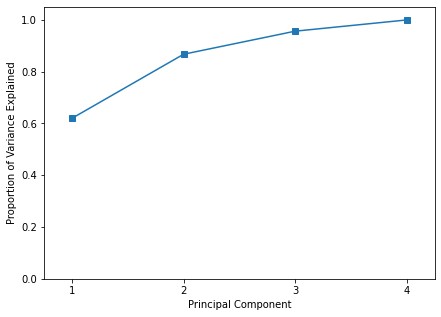

In [15]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

NCI 60

In [16]:
data2 = pd.read_csv('nci60.csv').drop('Unnamed: 0', axis=1)
data2.columns = np.arange(data2.columns.size)
data2.head()
y = pd.read_csv('nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [17]:
X = pd.DataFrame(scale(data2))
X.shape
pca2 = PCA()
plot_data = pd.DataFrame(pca2.fit_transform(X))

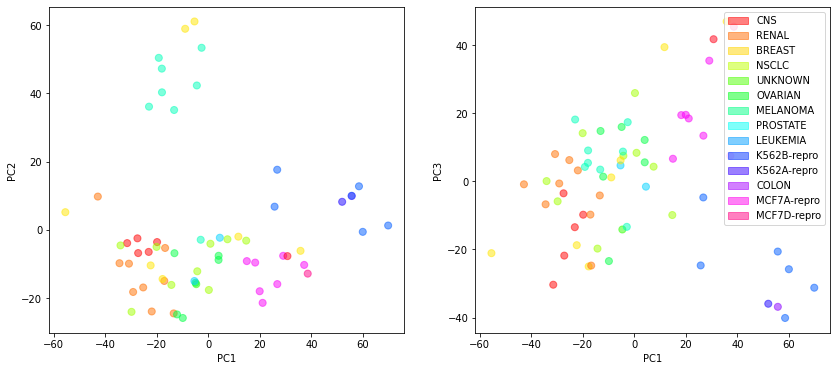

In [18]:
import matplotlib as mpl
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
color_idx = pd.factorize(y.type)[0]
cmap = plt.cm.hsv
ax1.scatter(plot_data.iloc[:,0], plot_data.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.scatter(plot_data.iloc[:,0], plot_data.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
handles = []
labels = pd.factorize(y.type.unique())
norm = plt.Normalize(0, labels[1].shape[0])
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles, labels[1], loc='best')
for ax in fig.axes:
    ax.set_xlabel('PC1')

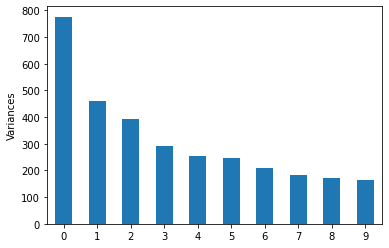

In [19]:
pd.DataFrame([plot_data.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
plot_data.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')
plt.show()

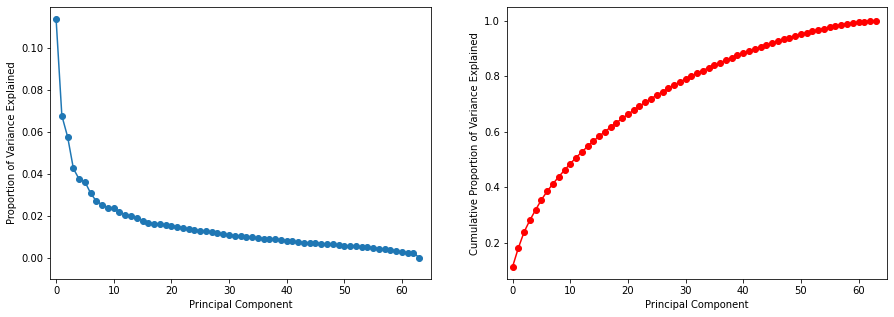

In [20]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)

for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)